In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data_dir = os.getcwd() + '/Data/'
traindata = pd.read_csv(data_dir + 'TrainData.csv')

# Removing WS100 related data
traindata = traindata.drop(['U100', 'V100', 'WS100'], axis=1)

---

## Data Inspection

In [5]:
traindata.head()

,TIMESTAMP,POWER,U10,V10,WS10
0,20120101 1:00,0.273678,0.534894,-3.660243,3.699120
1,20120101 2:00,0.086796,0.330813,-2.676430,2.696797
2,20120101 3:00,0.006811,-0.065839,-2.029072,2.030140
3,20120101 4:00,0.018646,-0.419549,-1.799090,1.847362
4,20120101 5:00,0.034812,-0.754224,-1.661526,1.824698


In [6]:
traindata.shape

(16080, 5)

In [7]:
traindata.isnull().sum()

TIMESTAMP    0
POWER        0
U10          0
V10          0
WS10         0
dtype: int64

In [8]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16080 entries, 0 to 16079
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TIMESTAMP  16080 non-null  object 
 1   POWER      16080 non-null  float64
 2   U10        16080 non-null  float64
 3   V10        16080 non-null  float64
 4   WS10       16080 non-null  float64
dtypes: float64(4), object(1)
memory usage: 628.2+ KB


In [9]:
traindata.describe()

,POWER,U10,V10,WS10
count,16080.000000,16080.000000,16080.000000,16080.000000
mean,0.431744,0.835555,0.065609,4.204296
std,0.336587,3.537281,2.906424,1.996235
min,0.000000,-8.092973,-9.970424,0.078144
25%,0.113896,-2.017153,-1.964820,2.695771
50%,0.379385,0.713629,0.329663,3.881318
75%,0.747897,3.313748,2.126128,5.344101
max,1.000000,14.019047,8.709613,14.474997


### Visualisation of data

Pairplot shows relations among all the columns in the Dataframe

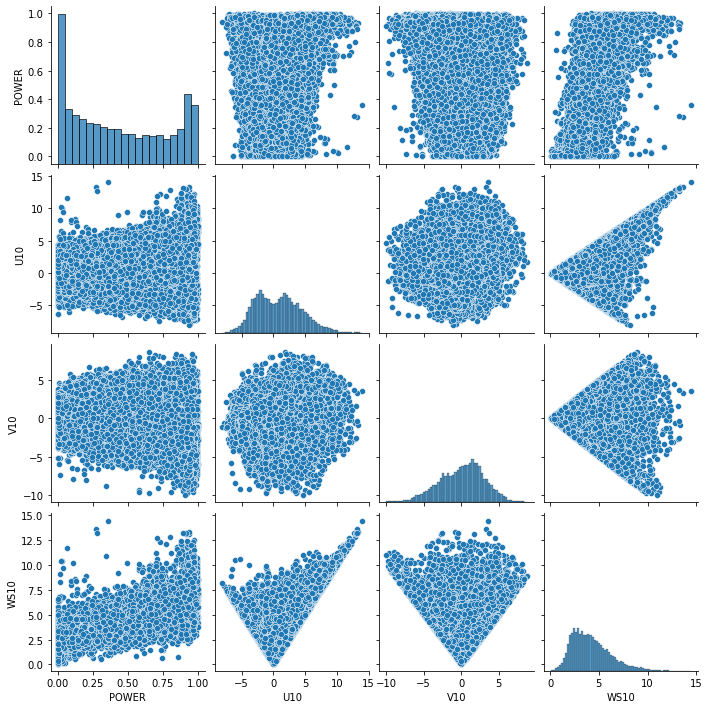

In [10]:
sns.pairplot(traindata)

Distribution of the chosen columns.

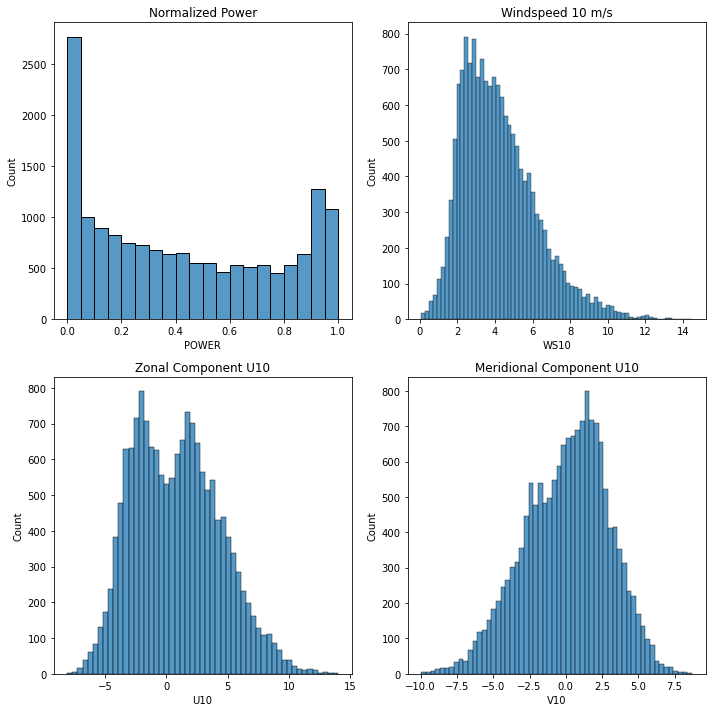

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Matplotlib style
# fig, axs = plt.subplots(2, 2, figsize=(10,10))
# axs[0, 0].hist(traindata['POWER'])
# axs[0, 0].set_title("Normalized Power")
# axs[1, 0].hist(traindata['WS10'])
# axs[1, 0].set_title('Windspeed 10 m/s')
# axs[0, 1].hist(traindata['U10'])
# axs[0, 1].set_title("Zonal Component U10")
# axs[1, 1].hist(traindata['V10'])
# axs[1, 1].set_title("Meridional Component U10")
# fig.tight_layout()

# Seaborn style (which I think looks nicer)
sns.histplot(ax=axs[0,0], x=traindata['POWER'])
axs[0, 0].set_title("Normalized Power")
sns.histplot(ax=axs[0,1], x=traindata['WS10'])
axs[0, 1].set_title('Windspeed 10 m/s')
sns.histplot(ax=axs[1,0], x=traindata['U10'])
axs[1, 0].set_title("Zonal Component U10")
sns.histplot(ax=axs[1,1], x=traindata['V10'])
axs[1, 1].set_title("Meridional Component U10")
fig.tight_layout()

It is also usefull to inspect the correlation between the columns. The diagonal 1.00 means only that each column is 100% correlated to itself.

In [12]:
traindata.corr()

,POWER,U10,V10,WS10
POWER,1.000000,0.298226,-0.178398,0.727077
U10,0.298226,1.000000,0.114517,0.512212
V10,-0.178398,0.114517,1.000000,-0.043980
WS10,0.727077,0.512212,-0.043980,1.000000


Heatmap visualisation of the correlation.

<AxesSubplot:>

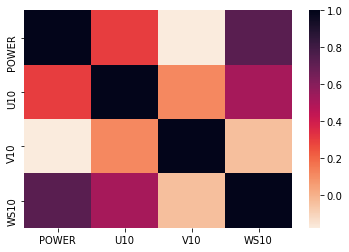

In [13]:
cmap = sns.cm.rocket_r
sns.heatmap(traindata.corr(), cmap=sns.cm.rocket_r)

Below is a boxplot which helps us visualize the outliers.

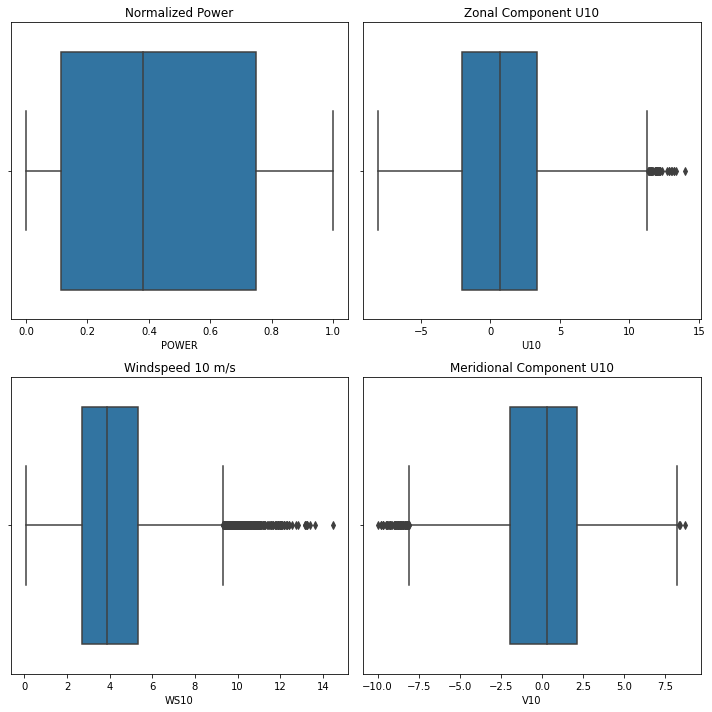

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

sns.boxplot(ax=axs[0,0], x=traindata['POWER'])
axs[0, 0].set_title("Normalized Power")
sns.boxplot(ax=axs[1,0], x=traindata['WS10'])
axs[1, 0].set_title('Windspeed 10 m/s')
sns.boxplot(ax=axs[0,1], x=traindata['U10'])
axs[0, 1].set_title("Zonal Component U10")
sns.boxplot(ax=axs[1,1], x=traindata['V10'])
axs[1, 1].set_title("Meridional Component U10")
fig.tight_layout()

---

## Data Cleaning

Below follow methods for cleaning data according to the Z-score and Interquartile Ranges. This 'tutorial' will focus on only on the 'WS10' column. But similar reductions may be performed on the entire dataframe except the 'TIMESTAMP' column, due to it being a string/ datetime value.

Based on this article: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

### Z-Score

In [15]:
from scipy import stats

In [16]:
# Dropping all columns but the WS10 and POWER

traindata = traindata.filter(['POWER', 'WS10'], axis=1)
traindata.head()

,POWER,WS10
0,0.273678,3.699120
1,0.086796,2.696797
2,0.006811,2.030140
3,0.018646,1.847362
4,0.034812,1.824698


Extracting windspeed and calculating the Z-score for it.

In [17]:
ws = traindata.filter(['WS10'], axis=1)
stats.zscore(ws)

array([[-0.25307183],
       [-0.75519443],
       [-1.08916201],
       ...,
       [-0.87318431],
       [-0.59512174],
       [-0.32739698]])

Absolute value of the Z scores

In [18]:
z = np.abs(stats.zscore(ws))
z

array([[0.25307183],
       [0.75519443],
       [1.08916201],
       ...,
       [0.87318431],
       [0.59512174],
       [0.32739698]])

These are column and row indexes for the values with Z-score above the threshold.

In [19]:
# threshold = 3
# print(np.where(z > threshold))

Distribution plot for the z score.

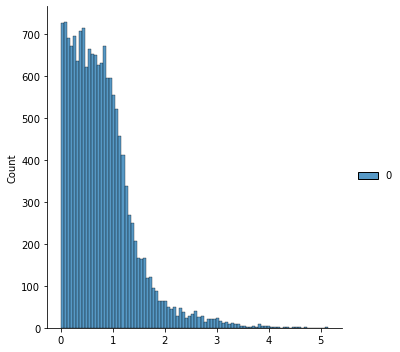

In [20]:
sns.displot(z)

In [21]:
# df = df[(np.abs(stats.zscore(df.select_dtypes(exclude='object'))) < 3).all(axis=1)]
traindata_z = traindata[(z < 3).all(axis=1)]

### Interquartile Range

Get IQRs for the windspeed column. Removing the brackets gets the IQR for all columns.

In [22]:
Q1 = traindata['WS10'].quantile(0.25)
Q3 = traindata['WS10'].quantile(0.75)
IQR = Q3 - Q1

IQR

2.6483293809

In [23]:
traindata_iqr = traindata[~((traindata['WS10'] < (Q1 - 1.5 * IQR)) | (traindata['WS10'] > (Q3 + 1.5 * IQR)))]

In [24]:
print(f'Numbers of rows and columns with no data cleaning: \t\t\t\t {traindata.shape}')
print(f'Numbers of rows and columns after removing outliers with Z-score method: \t {traindata_z.shape}')
print(f'Numbers of rows and columns after removing outliers with IQR-score method:\t {traindata_iqr.shape}')


Numbers of rows and columns with no data cleaning: 				 (16080, 2)
Numbers of rows and columns after removing outliers with Z-score method: 	 (15927, 2)
Numbers of rows and columns after removing outliers with IQR-score method:	 (15744, 2)


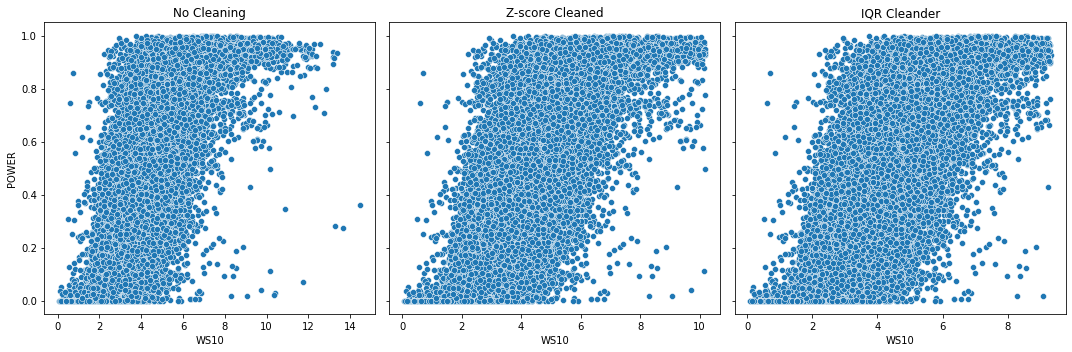

In [25]:
fig = plt.figure(figsize=(15,5))
gs = fig.add_gridspec(1, 3)
axs = gs.subplots(sharex=False, sharey=True)

sns.scatterplot(ax=axs[0], x=traindata['WS10'], y=traindata['POWER'])
axs[0].set_title("No Cleaning")
sns.scatterplot(ax=axs[1], x=traindata_z['WS10'], y=traindata_z['POWER'])
axs[1].set_title("Z-score Cleaned")
sns.scatterplot(ax=axs[2], x=traindata_iqr['WS10'], y=traindata_iqr['POWER'])
axs[2].set_title("IQR Cleander")
fig.tight_layout()

## Comparisons with Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
forecast_input = pd.read_csv(data_dir + "WeatherForecastInput.csv").filter(['WS10'])
solution = pd.read_csv(data_dir + "Solution.csv")

In [28]:
# Regular Data
X = traindata.filter(['WS10'])
y = traindata['POWER']

# Z score filtered data
X_z = traindata_z.filter(['WS10'])
y_z = traindata_z['POWER']

# IQR filtered data
X_iqr = traindata_iqr.filter(['WS10'])
y_iqr = traindata_iqr['POWER']

In [29]:
lr = LinearRegression()
lr_z = LinearRegression()
lr_iqr = LinearRegression()

In [30]:
lr.fit(X, y)
lr_z.fit(X_z, y_z)
lr_iqr.fit(X_iqr, y_iqr)

LinearRegression()

In [31]:
prediction = lr.predict(forecast_input)
prediction_z = lr_z.predict(forecast_input)
prediction_iqr = lr_iqr.predict(forecast_input)

In [32]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.12259336]
lr.intercept_: -0.08367458093320684


In [33]:
print("lr_z.coef_: {}".format(lr_z.coef_)) 
print("lr_z.intercept_: {}".format(lr_z.intercept_))

lr_z.coef_: [0.13033998]
lr_z.intercept_: -0.11197280569931911


In [34]:
print("lr_iqr.coef_: {}".format(lr_iqr.coef_)) 
print("lr_iqr.intercept_: {}".format(lr_iqr.intercept_))

lr_iqr.coef_: [0.13560305]
lr_iqr.intercept_: -0.13042128609114562


In [35]:
print("Training set score lr: {:.2f}".format(lr.score(X, y)))
print("Prediction set score lr: {:.2f}".format(lr.score(forecast_input, solution.filter(['POWER'], axis=1))))

Training set score lr: 0.53
Prediction set score lr: 0.45


In [36]:
print("Training set score lr_z: {:.2f}".format(lr_z.score(X, y)))
print("Prediction set score lr_z: {:.2f}".format(lr_z.score(forecast_input, solution.filter(['POWER'], axis=1))))

Training set score lr_z: 0.53
Prediction set score lr_z: 0.46


In [37]:
print("Training set score lr_iqr: {:.2f}".format(lr_iqr.score(X, y)))
print("Prediction set score lr_iqr: {:.2f}".format(lr_iqr.score(forecast_input, solution.filter(['POWER'], axis=1))))

Training set score lr_iqr: 0.52
Prediction set score lr_iqr: 0.46


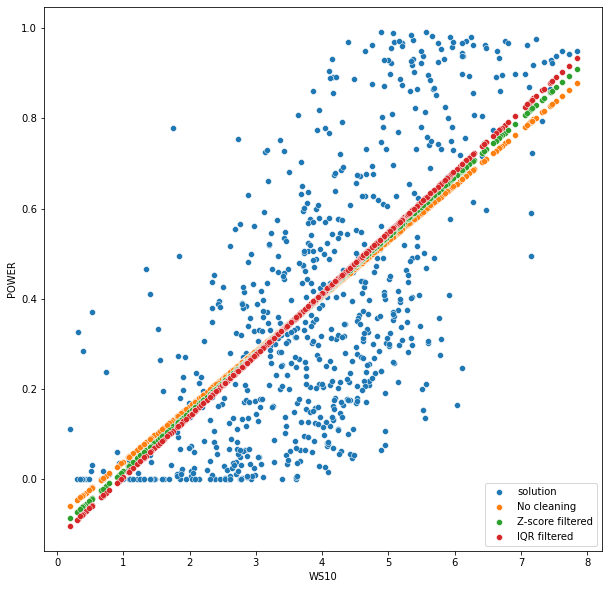

In [38]:
fig, axs = plt.subplots(figsize=(10, 10))

sns.scatterplot(ax=axs, x=forecast_input['WS10'], y=solution['POWER'], label='solution')
sns.scatterplot(ax=axs, x=forecast_input['WS10'], y=prediction, label='No cleaning')
sns.scatterplot(ax=axs, x=forecast_input['WS10'], y=prediction_z, label='Z-score filtered')
sns.scatterplot(ax=axs, x=forecast_input['WS10'], y=prediction_iqr, label='IQR filtered')
plt.legend(loc='lower right')

# Or with matplotlib
# ax.scatter(x=forecast_input['WS10'], y=solution['POWER'], c='grey', label='solution')
# ax.scatter(x=forecast_input['WS10'], y=prediction_z, c='r', label='prediction regular data')
# ax.scatter(x=forecast_input['WS10'], y=prediction_z, c='b', label='prediction Z-score data')
# ax.scatter(x=forecast_input['WS10'], y=prediction_iqr, c='g', label='prediction IQR data')


In [39]:
from sklearn import metrics

lr_rmse = np.sqrt(metrics.mean_squared_error(solution['POWER'], prediction))
lr_z_rmse = np.sqrt(metrics.mean_squared_error(solution['POWER'], prediction_z))
lr_iqr_rmse = np.sqrt(metrics.mean_squared_error(solution['POWER'], prediction_iqr))

rmse_eval = pd.DataFrame( {'RMSE': [lr_rmse, lr_z_rmse, lr_iqr_rmse]}, 
                         ['No data cleaning', 'Z-score filtered', 'IQR filtered'])
rmse_eval

,RMSE
No data cleaning,0.216384
Z-score filtered,0.215770
IQR filtered,0.215775


In [ ]:
solutionLR = pd.read_csv(data_dir + "Solution.csv")
solvedLR = solutionLR.drop(['POWER'], axis=1)
solvedLR["FORECAST"] = prediction
solvedLR.to_csv(data_dir+"ForecastTemplate1-LR.csv")

solutionLR = solutionLR.set_index('TIMESTAMP')
solvedPlotLR = solutionLR
solvedPlotLR["FORECAST_PRED"] = prediction
solvedPlotLR.plot(figsize=(11,5))

In [ ]:
solutionLR_Z = pd.read_csv(data_dir + "Solution.csv")
solvedLR_Z = solutionLR_Z.drop(['POWER'], axis=1)
solvedLR_Z["FORECAST"] = prediction_z
solvedLR_Z.to_csv(data_dir+"ForecastTemplate1-LR_Z.csv")

solutionLR_Z = solutionLR_Z.set_index('TIMESTAMP')
solvedPlotLR_Z = solutionLR_Z
solvedPlotLR_Z["FORECAST_PRED"] = prediction_z
solvedPlotLR_Z.plot(figsize=(11,5))

In [ ]:
solutionLR_iqr = pd.read_csv(data_dir + "Solution.csv")
solvedLR_iqr = solutionLR_iqr.drop(['POWER'], axis=1)
solvedLR_iqr["FORECAST"] = prediction_iqr
solvedLR_iqr.to_csv(data_dir+"ForecastTemplate1-LR_iqr.csv")

solutionLR_iqr = solutionLR_iqr.set_index('TIMESTAMP')
solvedPlotLR_iqr = solutionLR_iqr
solvedPlotLR_iqr["FORECAST_PRED"] = prediction_iqr
solvedPlotLR_iqr.plot(figsize=(11,5))